참고 : https://velog.io/@lazy_learner/LSTM-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%93%88-%EB%A7%8C%EB%93%A4%EA%B8%B0-1

In [4]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# 데이터 준비

In [35]:
df = pd.read_csv('./data/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000
...,...,...,...,...,...,...,...
1254,2020-07-02,81.431999,81.866669,79.040001,80.577332,80.577332,258751500
1255,2020-07-06,85.112663,91.852669,84.402664,91.438667,91.438667,308548500
1256,2020-07-07,93.667336,95.300003,89.113998,92.657333,92.657333,322345500
1257,2020-07-08,93.666664,94.484001,87.422668,91.058670,91.058670,244669500


- volume = 거래량

In [36]:
df.shape

(1259, 7)

- .values : numpy의 array 배열로 변경

In [52]:
training_set = df.iloc[:800, 1:2].values

In [53]:
test_set = df.iloc[800:, 1:2].values

In [54]:
training_set

array([[17.481333],
       [17.483334],
       [17.473333],
       [17.782667],
       [17.614668],
       [18.166668],
       [18.333332],
       [18.003332],
       [17.417999],
       [17.976667],
       [17.825333],
       [17.495333],
       [17.049999],
       [17.618   ],
       [17.512667],
       [17.84    ],
       [17.752666],
       [17.334   ],
       [17.572001],
       [16.636   ],
       [16.238667],
       [15.876667],
       [15.81    ],
       [15.666667],
       [15.990667],
       [16.482668],
       [17.037333],
       [17.025333],
       [17.355333],
       [16.804001],
       [15.733333],
       [13.519333],
       [15.368   ],
       [15.195333],
       [15.4     ],
       [16.124001],
       [16.374666],
       [16.022667],
       [16.353333],
       [16.804001],
       [16.059334],
       [16.336666],
       [16.803333],
       [16.482   ],
       [16.509333],
       [16.74    ],
       [16.85    ],
       [16.869333],
       [17.597334],
       [17.197332],


In [55]:
test_set

array([[18.762667],
       [19.201332],
       [19.250668],
       [19.336   ],
       [19.779333],
       [18.700666],
       [20.237333],
       [19.846666],
       [19.898666],
       [20.      ],
       [20.127333],
       [20.860001],
       [18.017332],
       [20.384666],
       [20.93    ],
       [20.222   ],
       [19.596666],
       [18.309999],
       [17.634666],
       [17.016666],
       [17.640667],
       [17.168667],
       [17.4     ],
       [17.270666],
       [17.713333],
       [18.826668],
       [17.952667],
       [17.826   ],
       [17.378668],
       [17.591333],
       [20.07    ],
       [21.148001],
       [20.549999],
       [22.497999],
       [21.892668],
       [22.169333],
       [22.550667],
       [22.916   ],
       [22.700001],
       [22.604668],
       [22.889334],
       [23.233334],
       [23.266666],
       [23.224667],
       [22.210667],
       [22.846666],
       [22.822001],
       [23.012667],
       [23.756001],
       [22.783333],


# 스케일링

In [39]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [43]:
x_train = []
y_train = []

# time-steps : 60, output : 1

for i in range(60, 800): 
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
x_train.shape

(740, 60)

In [45]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [46]:
x_train.shape

(740, 60, 1)

In [22]:
print(y_train[0]) # 첫 번째 y값 인덱스 61
print(x_train[1][-1]) # 두 번째 x_train 인덱스 1~61

0.43589637508483803
[0.43589638]


In [26]:
print(y_train[1]) # 첫 번째 y값 인덱스 62
print(x_train[2][-1])

0.3997217416156186
[0.39972174]


# 모델 정의

In [56]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

# 컴파일

In [57]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

# 학습

In [58]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 12s 79ms/step - loss: 0.0790
Epoch 2/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0148
Epoch 3/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0117
Epoch 4/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0109
Epoch 5/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0097
Epoch 6/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0096
Epoch 7/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0096
Epoch 8/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0083
Epoch 9/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0093
Epoch 10/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0104
Epoch 11/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0084
Epoch 12/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0083
Epoch 13/100
24/24 [====

# 테스트 데이터

In [59]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0) # 행 방향 순서대로 합침

In [60]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [68]:
x_test = []

for i in range(60, 519):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [69]:
x_test.shape

(459, 60, 1)

In [71]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # 스케일링 반대

15/15 [==============================] - 0s 18ms/step


# 시각화

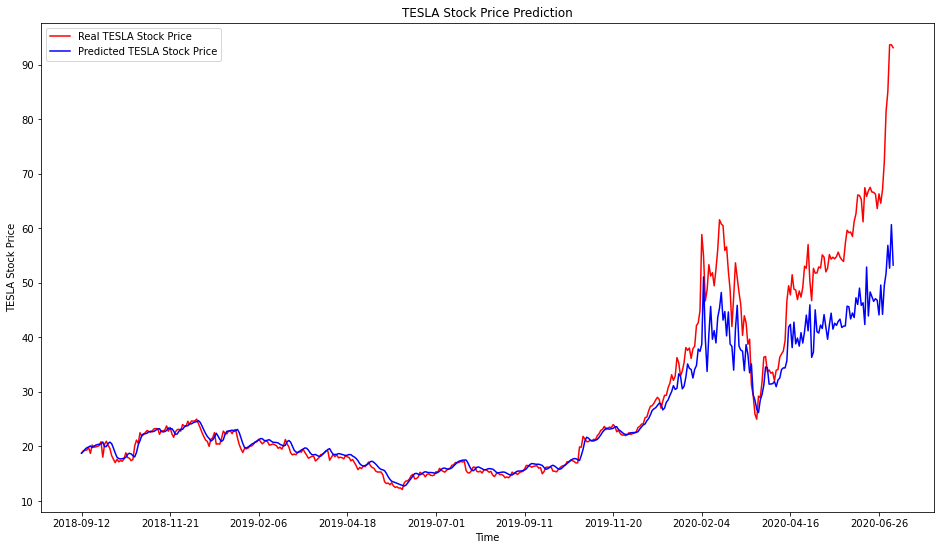

In [72]:
plt.figure(figsize=(16,9))
plt.plot(df.loc[800:, 'Date'], dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'], predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0, 459, 50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()